In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [2]:
def show(img, figsize=(10, 10), title="Image"):
    figure=plt.figure(figsize=figsize)
    
    plt.imshow(img)
    plt.show()
    
def get_size(filename="dd.png"):
    stat = os.stat(filename)
    size=stat.st_size
    return size

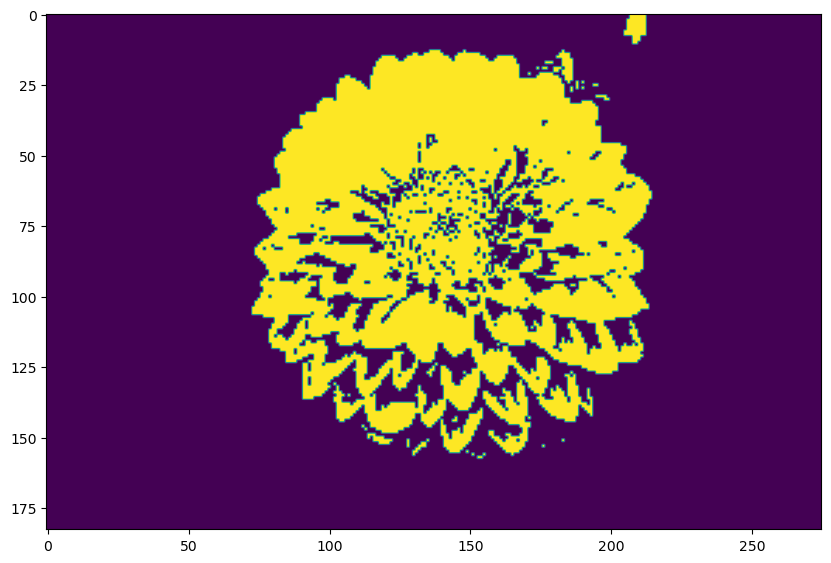

[[207   0]
 [  6   1]
 [255   0]
 ...
 [255   0]
 [255   0]
 [110   0]]


In [7]:
def RLE_encoding(img, bits=8, binary=True, view=True):
    """
    img: Grayscale img.
    bits: run length makasimum adalah 2^bits
    """
    if binary:
        ret,img = cv2.threshold(img,127,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        
    if view:
        show(img)
        
    encoded = []
    shape=img.shape
    count = 0
    prev = None
    fimg = img.flatten()
    th=127
    for pixel in fimg:
        if binary:
            if pixel<th:
                pixel=0
            else:
                pixel=1
        if prev==None:
            prev = pixel
            count+=1
        else:
            if prev!=pixel:
                encoded.append((count, prev))
                prev=pixel
                count=1
            else:
                if count<(2**bits)-1:
                    count+=1
                else:
                    encoded.append((count, prev))
                    prev=pixel
                    count=1
    encoded.append((count, prev))
    
    return [np.array(encoded), img]


## ujicoba
fpath="flower.jpg"
img = cv2.imread(fpath, 0)
shape=img.shape
[encoded, ori] = RLE_encoding(img, bits=8)
print(encoded)

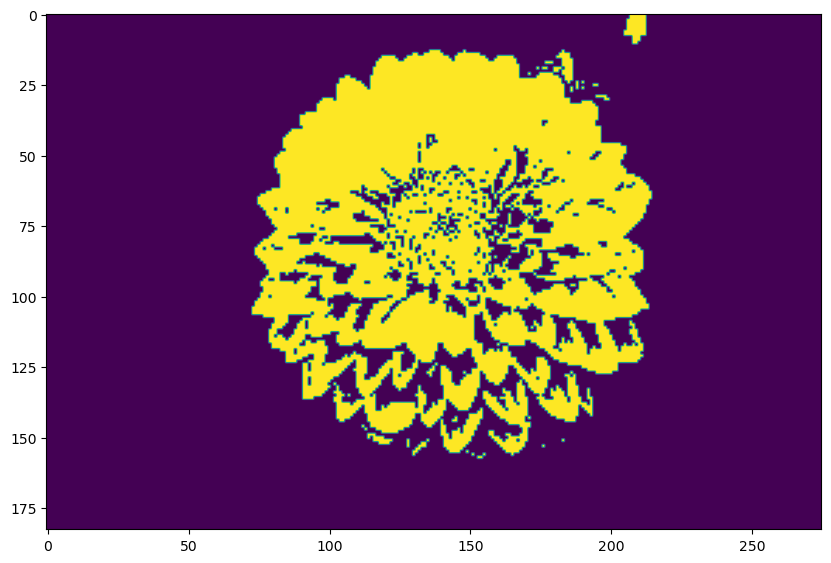

In [8]:
def RLE_decode(encoded, shape):
    decoded=[]
    for rl in encoded:
        r,p = rl[0], rl[1]
        decoded.extend([p]*r)
    dimg = np.array(decoded).reshape(shape)
    return dimg

dimg = RLE_decode(encoded, shape)
show(dimg)

In [9]:
cv2.imwrite("encoded.tif", encoded)
cv2.imwrite("encoded.png", encoded)
cv2.imwrite("encoded.bmp", encoded)

True

In [10]:
files = ["encoded.png", "encoded.tif", "encoded.bmp",fpath]
for f in files:
    print(f"File: {f} => Size: {get_size(f)} Bytes")

File: encoded.png => Size: 3984 Bytes
File: encoded.tif => Size: 19420 Bytes
File: encoded.bmp => Size: 10706 Bytes
File: flower.jpg => Size: 7044 Bytes


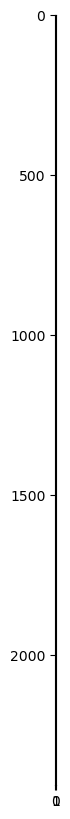

In [11]:
# Display hasil encode RLE
show(encoded)

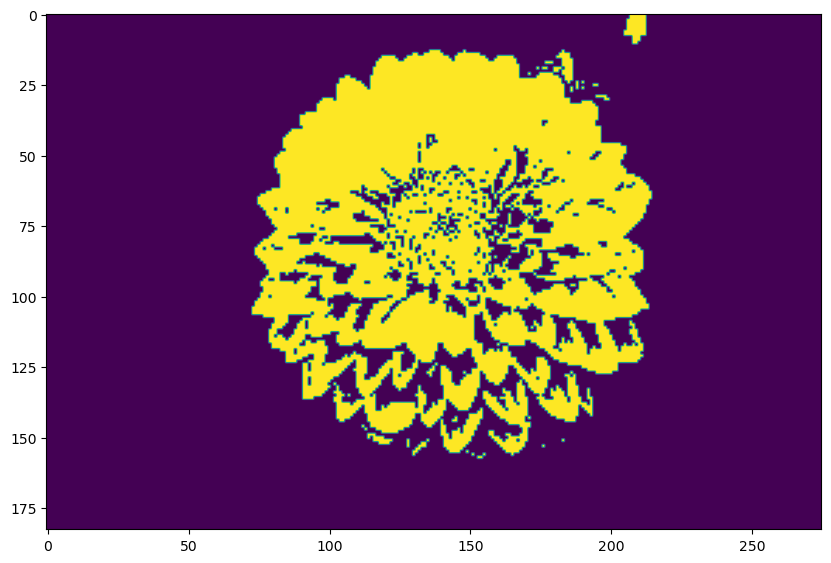

In [12]:
# gambar hasil decode RLE
show(dimg)

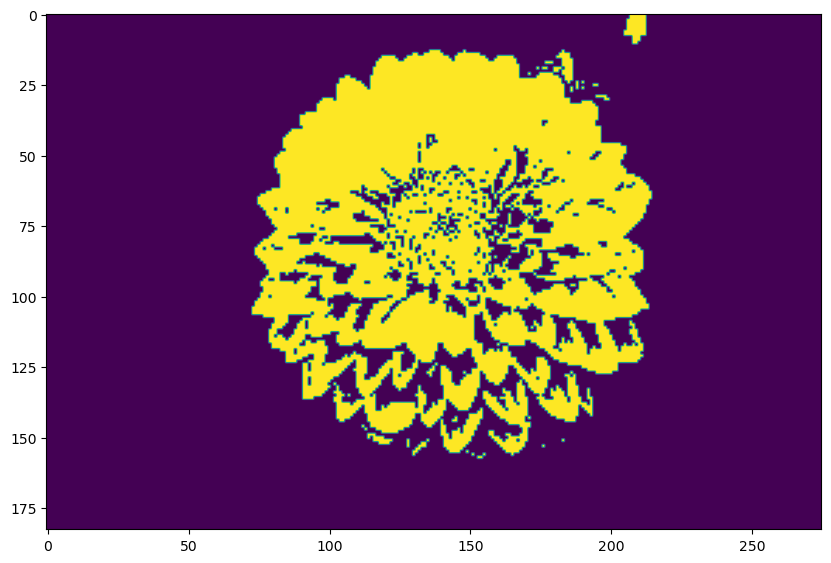

In [13]:
# display gambar asli
show(ori)

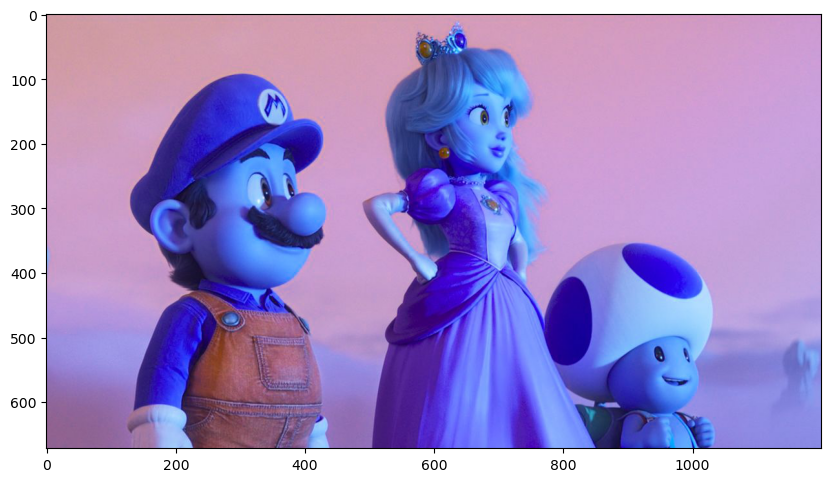

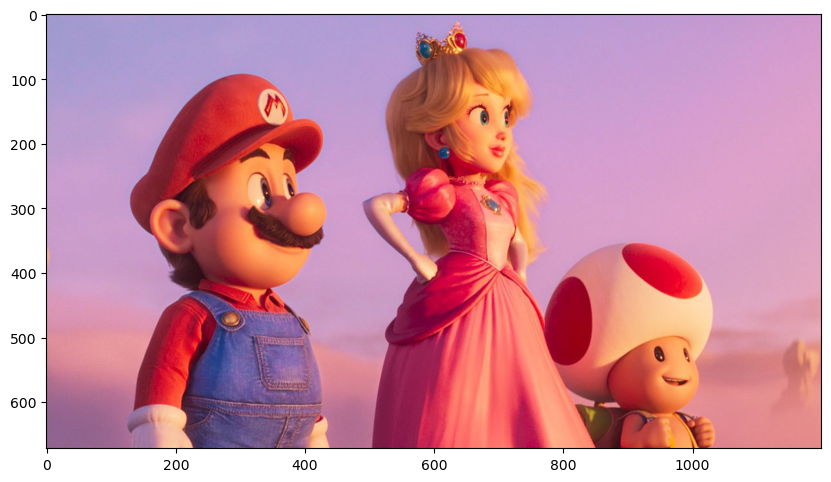

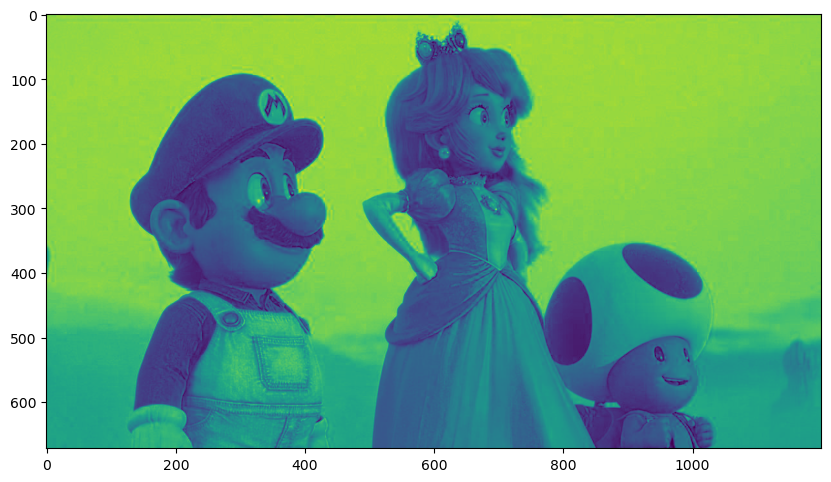

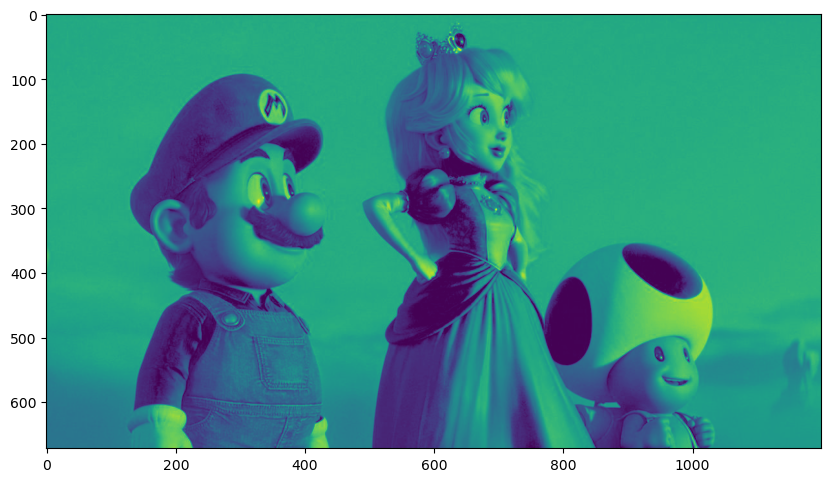

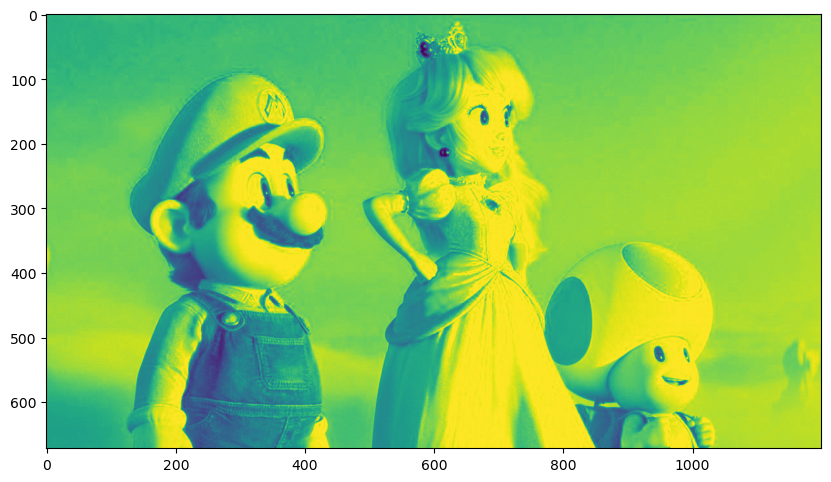

Original size: 73.4951171875 Byte, TIFF: 10641.2578125 Byte, NPZ: 10633.8046875 Byte


In [17]:
bgr = cv2.imread("mario.png", 1)
show(bgr)

show(cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB))

b, g, r = bgr[:, :, 0], bgr[:, :, 1], bgr[:, :, 2]

[be, imgbe] = RLE_encoding(b, binary=False)
[ge, imgge] = RLE_encoding(g, binary=False)
[re, imgre] = RLE_encoding(r, binary=False)

be.shape, ge.shape, re.shape
np.savez("rgbe.npz", [be, ge, re], dtype=object)
get_size("rgbe.npz")

np.savez("be.npz", be)
np.savez("ge.npz", ge)
np.savez("re.npz", re)

cv2.imwrite("be.tif", be)
cv2.imwrite("ge.tif", ge)
cv2.imwrite("re.tif", re)

files = "bgr"

snp = 0
stif = 0

for f in files:
    ft=""+f+"e"+".npz"
    snp+=get_size(ft)
    
    ft=""+f+"e"+".tif"
    stif+=get_size(ft)
print(f"Original size: {get_size('mario.png')/1024} Byte, TIFF: {stif/1024} Byte, NPZ: {snp/1024} Byte")